#Apprentissage non supervisé

##Librairie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [2]:
def dunn_index(X, labels):
    # Calcul des distances entre tous les points
    distances = pairwise_distances(X)

    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)

    min_inter_cluster = np.inf
    max_intra_cluster = 0

    for i in range(num_clusters):
        cluster_i = X[labels == unique_labels[i]]

        if len(cluster_i) > 1:
            intra_cluster_distance = np.max(pairwise_distances(cluster_i))
            max_intra_cluster = max(max_intra_cluster, intra_cluster_distance)

        for j in range(i + 1, num_clusters):
            cluster_j = X[labels == unique_labels[j]]

            inter_cluster_distance = np.min(pairwise_distances(cluster_i, cluster_j))
            min_inter_cluster = min(min_inter_cluster, inter_cluster_distance)

    # Calcul de l'indice de Dunn
    dunn_index_value = min_inter_cluster / max_intra_cluster
    return dunn_index_value

#Partie 1 : Préparation des données


##1.1 Chargement et exploration des données

In [3]:
df=pd.read_csv("Cust_Segmentation.csv")

In [67]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [6]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [7]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


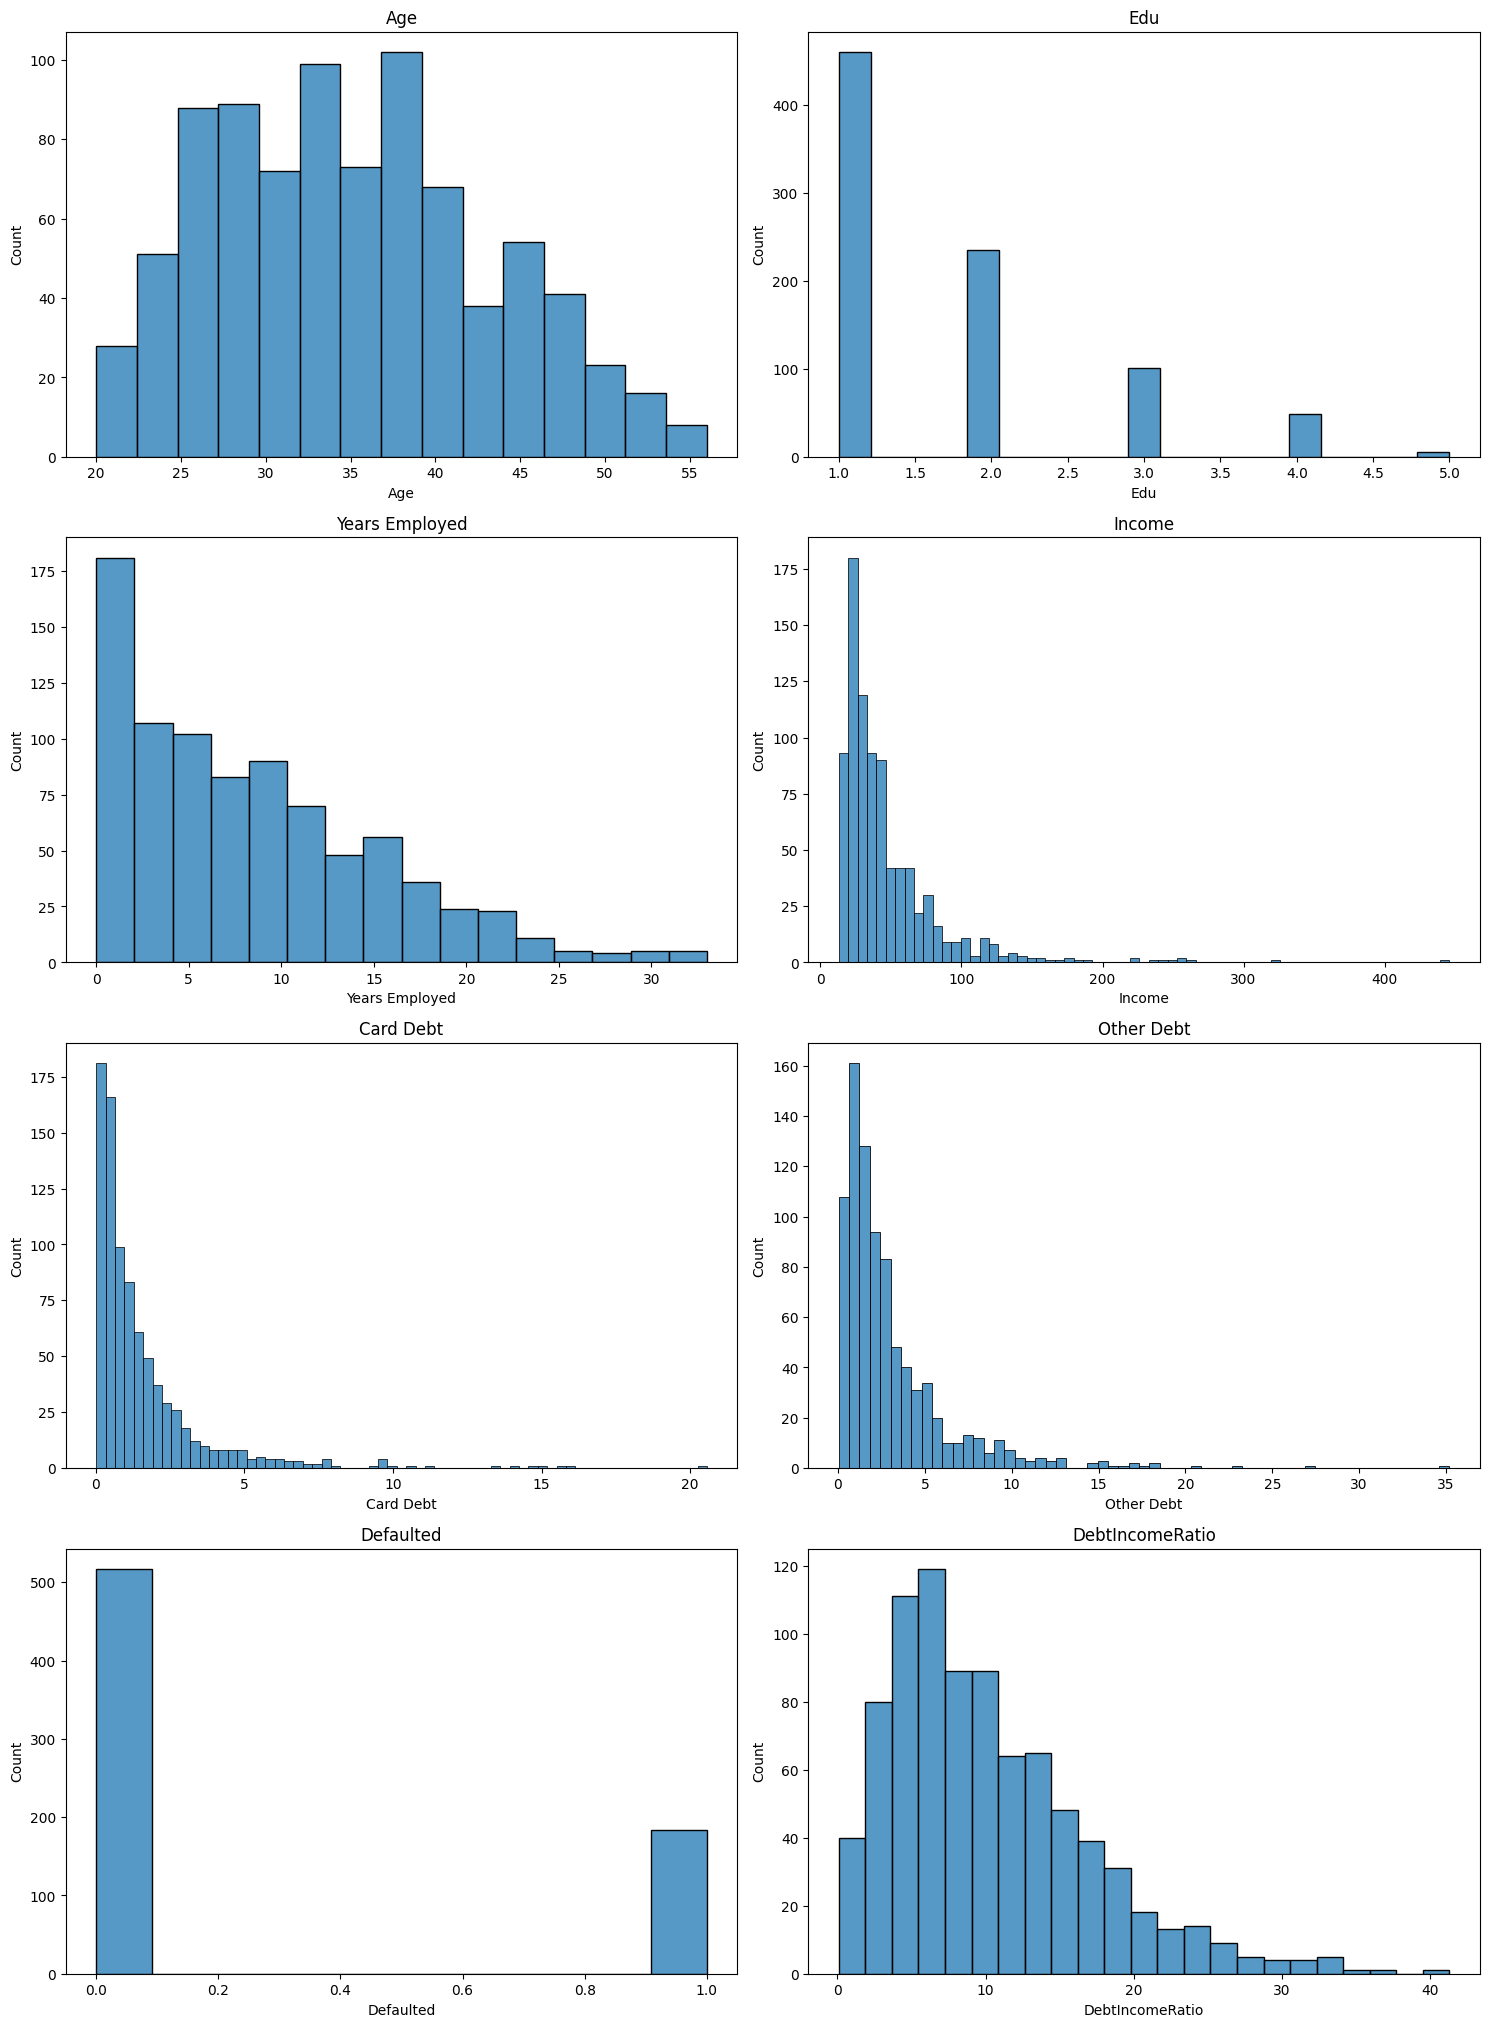

In [4]:
num_cols = len(df.columns)
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

plt.figure(figsize=(15, num_rows*5))
for i, column in enumerate(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'Defaulted', 'DebtIncomeRatio']):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(df[column].dropna())
    plt.title(column)
plt.tight_layout() # pour éviter le chevauchement des graphiques
plt.show()

##1.2 Nettoyage des données

In [5]:
df.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [6]:
df= df.drop(["Customer Id","Address"], axis=1)


In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [10]:

scaler = StandardScaler()
column_to_standardize = ['Age', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'DebtIncomeRatio', 'Edu', 'Defaulted']
df_standardize = scaler.fit_transform(df[column_to_standardize])


In [13]:
df_standardize=pd.DataFrame(df_standardize, columns=column_to_standardize)

##Visualisation des données

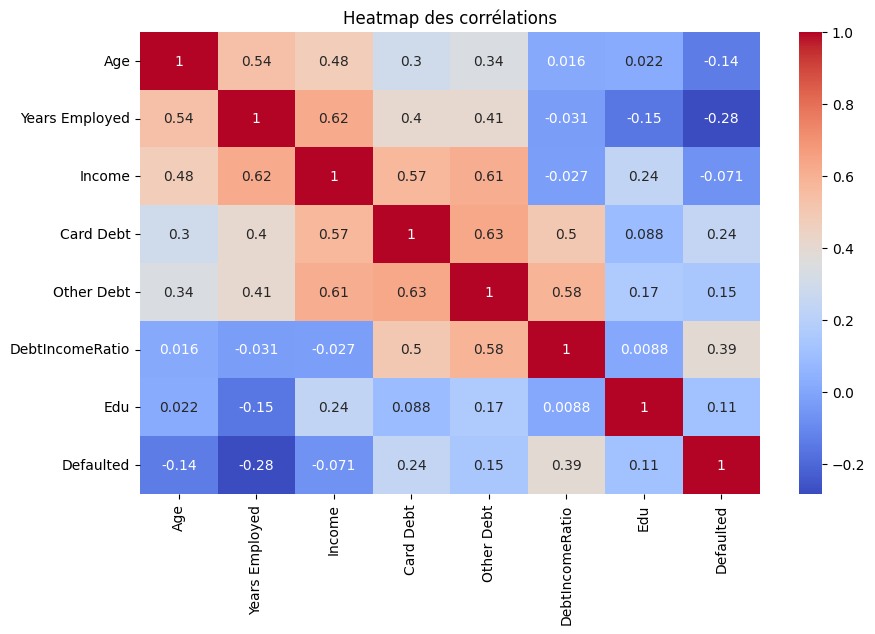

In [14]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_standardize.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap des corrélations')
plt.show()

#Partie 2 : Clustering

##Kmeans


In [16]:
import warnings
# Supprimer les warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

Pour 2 clusters Score de Silhouette : 0.33496643365707623
Pour 2 clusters Indice de Davies-Bouldin : 1.524543080361928
Pour 2 clusters indice de Dunn: 0.040891096824381905

Pour 3 clusters Score de Silhouette : 0.27163714546797385
Pour 3 clusters Indice de Davies-Bouldin : 1.3908793366849073
Pour 3 clusters indice de Dunn: 0.040891096824381905

Pour 4 clusters Score de Silhouette : 0.2483377629854806
Pour 4 clusters Indice de Davies-Bouldin : 1.4177739387792663
Pour 4 clusters indice de Dunn: 0.03289047859424682

Pour 5 clusters Score de Silhouette : 0.23458980138701302
Pour 5 clusters Indice de Davies-Bouldin : 1.3910205267173161
Pour 5 clusters indice de Dunn: 0.029876081259233002

Pour 6 clusters Score de Silhouette : 0.23821684761152068
Pour 6 clusters Indice de Davies-Bouldin : 1.310661637135978
Pour 6 clusters indice de Dunn: 0.030798899269737577

Pour 7 clusters Score de Silhouette : 0.23097356730366886
Pour 7 clusters Indice de Davies-Bouldin : 1.3426195923677444
Pour 7 cluster

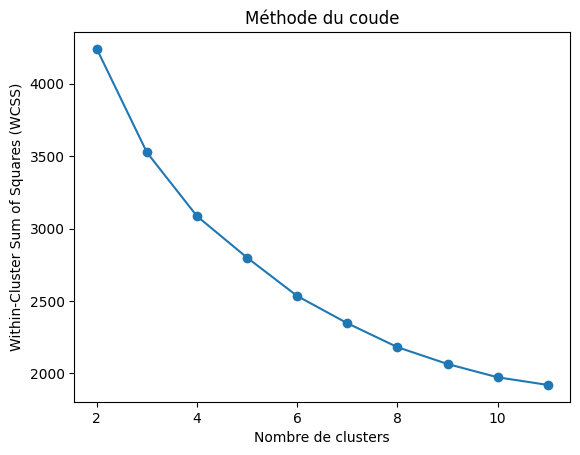

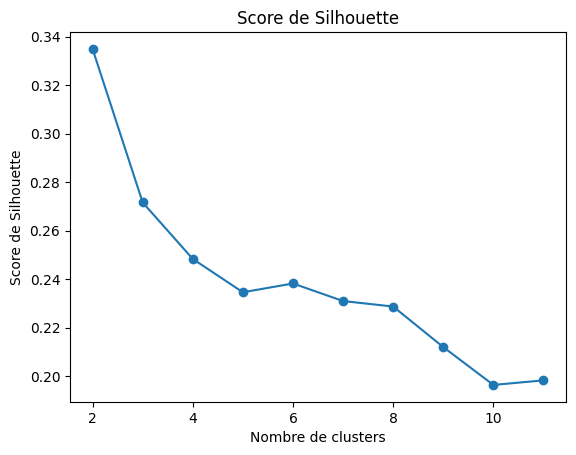

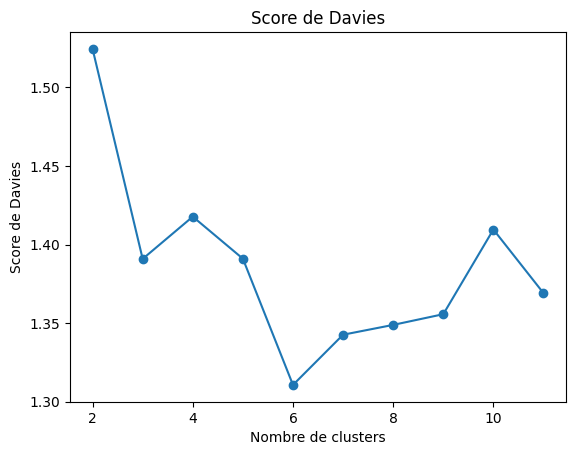

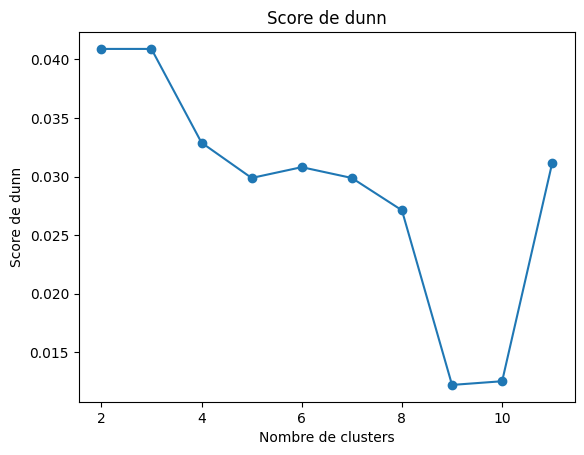

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

wscc = []
silhouettes = []
Davies = []
dunn=[]
I = range(2, 12)

for i in I:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_standardize)
    wscc.append(kmeans.inertia_)
    labels = kmeans.labels_

    # Calcul du Score de Silhouette
    silhouette_avg = silhouette_score(df_standardize, labels)
    silhouettes.append(silhouette_avg)
    print(f"Pour {i} clusters Score de Silhouette : {silhouette_avg}")

    # Calcul de l'Indice de Davies-Bouldin
    davies_bouldin_index = davies_bouldin_score(df_standardize, labels)
    Davies.append(davies_bouldin_index)
    print(f"Pour {i} clusters Indice de Davies-Bouldin : {davies_bouldin_index}")

    # Calcul de l'indice de Dunn
    dunn_index_value = dunn_index(df_standardize, labels)
    dunn.append(dunn_index_value)
    print(f'Pour {i} clusters indice de Dunn: {dunn_index_value}')
    print()

# Affichage des résultats WSCC
plt.plot(I, wscc, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()

# Affichage des scores de silhouette
plt.plot(I, silhouettes, marker='o')
plt.title("Score de Silhouette")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de Silhouette")
plt.show()

# Affichage des scores de Davies
plt.plot(I, Davies, marker='o')
plt.title("Score de Davies")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de Davies")
plt.show()

# Affichage des scores de dunn
plt.plot(I, dunn, marker='o')
plt.title("Score de dunn")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de dunn")
plt.show()

## Avec le Kmeans, 3 clusters fournissent une balance raisonnable entre la cohésion intra-cluster et la séparation inter-cluster

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_standardize)
label = kmeans.labels_
print(y_kmeans)

[1 0 2 1 0 1 1 0 2 1 2 1 1 1 1 2 0 0 1 1 1 1 0 2 1 2 2 1 2 0 2 0 1 1 1 0 0
 2 2 2 2 1 1 1 0 1 0 0 1 1 1 2 1 2 1 1 1 1 1 1 1 0 1 2 0 0 2 2 1 1 2 2 1 1
 2 1 2 1 2 2 0 1 1 1 1 2 1 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1
 1 1 0 1 2 1 1 1 2 1 1 0 2 2 0 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 1 2 0 2 1 1 0
 2 0 1 1 0 2 1 1 0 0 1 0 2 1 2 1 0 1 2 1 1 1 2 2 1 2 0 1 1 1 1 0 1 2 0 1 1
 1 0 1 2 0 1 1 1 1 1 0 1 1 1 1 1 0 2 1 2 1 1 1 2 0 2 0 1 1 2 1 1 2 2 2 1 1
 1 1 0 0 1 1 0 1 1 2 1 1 2 1 2 0 1 1 1 1 2 1 0 2 1 1 1 1 1 2 2 0 1 0 1 1 2
 2 1 1 1 0 2 1 1 2 1 0 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 2 1 2 1 1 1
 0 0 1 2 1 0 2 2 1 1 2 1 1 1 1 0 1 0 1 1 1 1 0 1 2 1 0 1 1 1 2 1 1 0 2 0 1
 1 1 2 2 1 2 0 1 0 1 0 1 2 1 1 0 2 1 0 1 1 1 0 1 1 1 1 0 2 1 1 1 1 0 2 1 1
 0 1 2 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 2 1 1 1 2 2 1 1 1 1 1 0 2 2 1 0 1 1
 1 2 0 2 2 2 2 1 1 2 1 2 2 1 2 0 1 2 1 2 0 0 1 2 1 2 2 2 1 1 0 1 2 1 1 2 1
 2 1 1 1 2 1 0 1 0 1 0 1 2 1 1 1 2 2 1 1 0 1 1 0 1 2 1 2 1 2 2 2 0 2 1 1 2
 1 1 1 0 2 2 1 1 1 1 1 2 

In [19]:
df['cluster_km'] = label

In [20]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster_km
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0
...,...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4,1
846,28,2,7,34,0.359,2.021,0.0,7.0,1
847,25,4,0,18,2.802,3.210,1.0,33.4,2
848,32,1,12,28,0.116,0.696,0.0,2.9,1


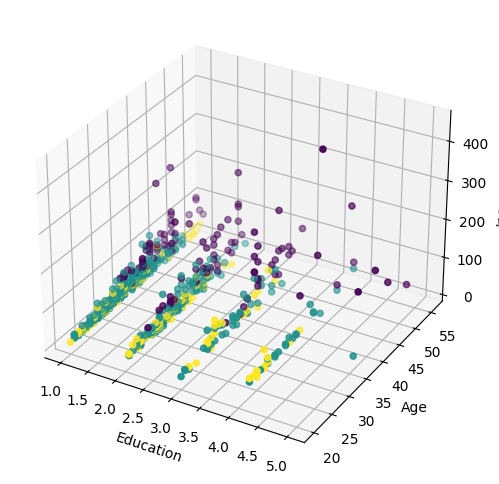

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Edu'],df['Age'],df['Income'], c = label.astype(float))

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
plt.show()

In [22]:
cluster_stat_km=df.groupby('cluster_km').mean()
cluster_stat_km

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_km,,,,,,,,
0,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
1,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884
2,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025


##Hiearchical cluster

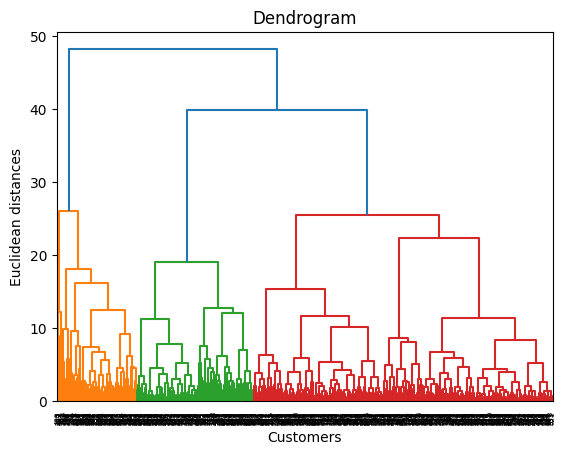

In [24]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_standardize, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [25]:
cluster_stat_hc=df.groupby('cluster_km').mean()
cluster_stat_hc

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster_km,,,,,,,,
0,43.112000,1.960000,16.904000,96.056000,4.172896,7.811616,0.208000,14.398400
1,33.727053,1.601449,7.644928,36.246377,0.788126,1.748710,0.000000,7.581884
2,31.366460,1.850932,3.689441,30.484472,1.488199,2.734901,0.975155,13.936025


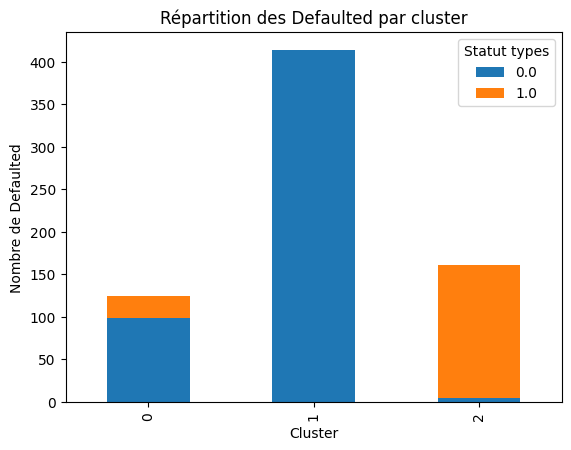

In [52]:
# Créer une table de contingence entre cluster_label et statut_types
contingency_table = pd.crosstab(df['cluster_km'], df['Defaulted'])

contingency_table.plot(kind='bar', stacked=True)


plt.xlabel('Cluster')
plt.ylabel('Nombre de Defaulted')
plt.title('Répartition des Defaulted par cluster')

plt.legend(title='Statut types')

# Afficher le graphique
plt.show()

##DBSCAN

In [26]:
df_standardiz=df_standardize.to_numpy()

In [27]:
df_standardiz.shape

(700, 8)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Charger vos données (par exemple avec des données iris)
#from sklearn.datasets import load_iris
#X = load_iris().data

# Calculer les k-distances
k = 4  # k est typiquement choisi comme min_samples - 1
nbrs = NearestNeighbors(n_neighbors=k).fit(df_standardiz)
distances, indices = nbrs.kneighbors(df_standardiz)


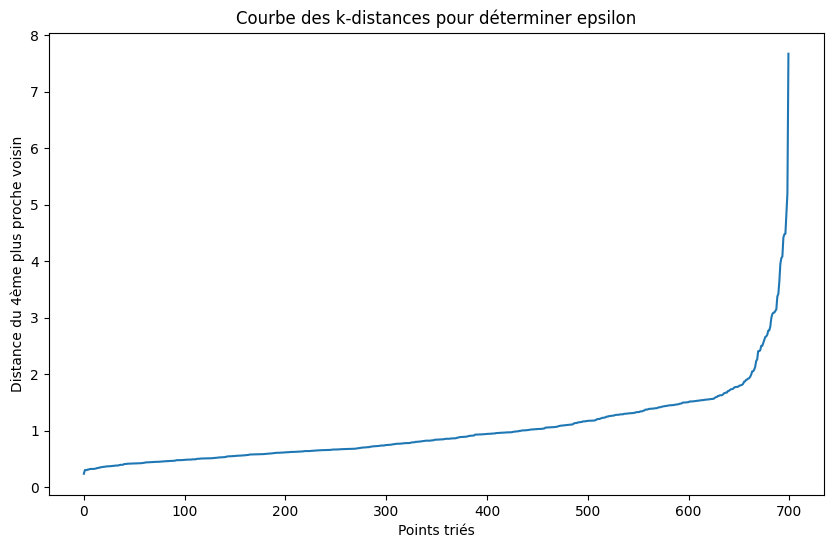

In [38]:
# Tracer la courbe des k-distances
distances = np.sort(distances[:, k-1], axis=0)
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Courbe des k-distances pour déterminer epsilon')
plt.xlabel('Points triés')
plt.ylabel('Distance du 4ème plus proche voisin')
plt.show()

#epsilon = distances[np.argmax(np.diff(distances))]


A partir de epsilon egale a 2 nous observont une monté significative

In [44]:
epsilon=2

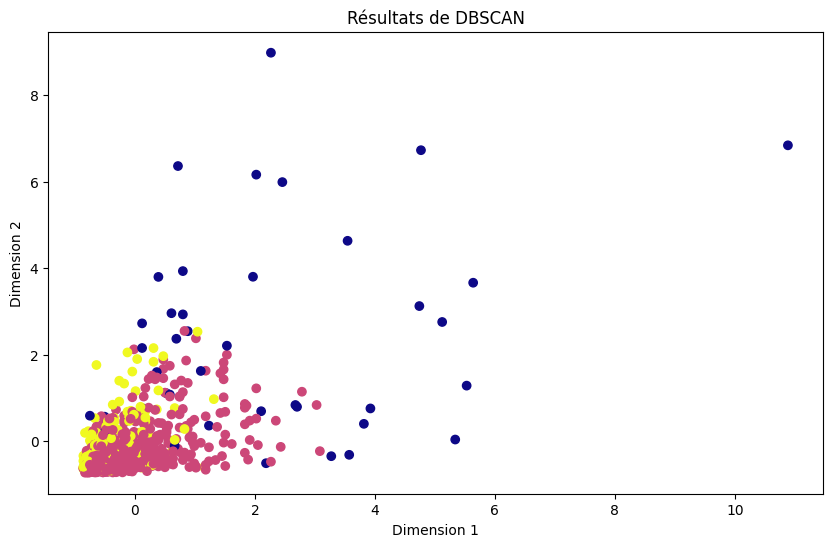

Nombre de clusters trouvés : 2


In [45]:
min_samples = 2 * df_standardiz.shape[1]

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df_standardiz)

plt.figure(figsize=(10, 6))
plt.scatter(df_standardiz[:, 2], df_standardiz[:, 3], c=db.labels_, cmap='plasma')
plt.title('Résultats de DBSCAN')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Nombre de clusters trouvés, en excluant le bruit
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
print(f'Nombre de clusters trouvés : {n_clusters_}')


Avec le DBSCAN on obtient 2 cluster et la troisième coloration bleu est le bruit des données

In [46]:
df_standardiz.


array([[ 0.76830405, -0.35900652, -0.72310225, ..., -0.58052847,
         0.29879269, -0.59494973],
       [ 1.51908977,  2.64702891,  1.47870741, ...,  0.37222169,
        -0.77932527, -0.59494973],
       [-0.23274357,  0.24220057,  0.30984549, ...,  1.55949495,
         0.29879269,  1.68081427],
       ...,
       [-1.2337912 , -1.26081715, -0.75028509, ...,  3.39170678,
         2.45502862,  1.68081427],
       [-0.35787453,  0.54280411, -0.47845673, ..., -1.07889008,
        -0.77932527, -0.59494973],
       [ 2.14474454,  1.1440112 ,  0.50012534, ..., -0.24340149,
        -0.77932527, -0.59494973]])

In [ ]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Application de PCA
pca = PCA(n_components=3)
df_standardize['cluster_km'] = label
pca_result = pca.fit_transform(df_standardize)

# Clusters et couleurs
clusters = label
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k']

# Visualisation des résultats de PCA en 2D
plt.figure(figsize=(8, 6))
for cluster in set(clusters):
    indices = [i for i, x in enumerate(clusters) if x == cluster]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1],
                c=colors[cluster % len(colors)], edgecolor='k', s=50, label=f'Cluster {cluster}')

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Réduction de dimension avec PCA en 2D')
plt.legend()
plt.grid(True)
plt.show()